# Recurrent_Neural_Networks

Predicting Google Stock Price

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing the Training set

In [3]:
trainingset = pd.read_csv("Googlestock Train.csv")

In [4]:
trainingset.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
x = trainingset.iloc[:,1:2].values

In [8]:
print("print open column:", x[0 :5])

open column: [[325.25]
 [331.27]
 [329.83]
 [328.34]
 [322.04]]


Feature Scaling

In [10]:
from sklearn.preprocessing import MinMaxScaler
ps = MinMaxScaler(feature_range = (0,1))
scaleddata = ps.fit_transform(x)

In [11]:
print("print scaledata:", scaleddata[0 :5])

print scaledata: [[0.08581368]
 [0.09701243]
 [0.09433366]
 [0.09156187]
 [0.07984225]]


Creating Datastructure with 80 timesteps and 1 output

In [12]:
X_train = []
Y_train = []
for i in range(80,1258):
    X_train.append(scaleddata[i-80:i,0])
    Y_train.append(scaleddata[i,0])
X_train,Y_train = np.array(X_train),np.array(Y_train)   

In [15]:
print("X_train:", X_train[0 :2])

X_train: [[0.08581368 0.09701243 0.09433366 0.09156187 0.07984225 0.0643277
  0.0585423  0.06568569 0.06109085 0.06639259 0.0614257  0.07474514
  0.02797827 0.02379269 0.02409033 0.0159238  0.01078949 0.00967334
  0.01642607 0.02100231 0.02280676 0.02273235 0.02810849 0.03212665
  0.0433812  0.04475779 0.04790163 0.0440695  0.04648783 0.04745517
  0.04873875 0.03936305 0.04137213 0.04034898 0.04784582 0.04325099
  0.04356723 0.04286033 0.04602277 0.05398467 0.05738894 0.05714711
  0.05569611 0.04421832 0.04514845 0.04605997 0.04412531 0.03675869
  0.04486941 0.05065481 0.05214302 0.05612397 0.05818885 0.06540665
  0.06882953 0.07243843 0.07993526 0.07846566 0.08034452 0.08497656
  0.08627874 0.08471612 0.07454052 0.07883771 0.07238262 0.06663442
  0.06315574 0.06782499 0.06823424 0.07601012 0.08082819 0.05807724
  0.04468338 0.04421832 0.04202322 0.04070243 0.03017338 0.03512166
  0.0404606  0.04685989]
 [0.09701243 0.09433366 0.09156187 0.07984225 0.0643277  0.0585423
  0.06568569 0.0

In [17]:
print("Y_train:", Y_train[0 :5])

Y_train: [0.05067341 0.04879455 0.04027457 0.03787484 0.04566932]


Reshaping

In [18]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [21]:
print("X_train:", X_train[0 :2])

X_train: [[[0.08581368]
  [0.09701243]
  [0.09433366]
  [0.09156187]
  [0.07984225]
  [0.0643277 ]
  [0.0585423 ]
  [0.06568569]
  [0.06109085]
  [0.06639259]
  [0.0614257 ]
  [0.07474514]
  [0.02797827]
  [0.02379269]
  [0.02409033]
  [0.0159238 ]
  [0.01078949]
  [0.00967334]
  [0.01642607]
  [0.02100231]
  [0.02280676]
  [0.02273235]
  [0.02810849]
  [0.03212665]
  [0.0433812 ]
  [0.04475779]
  [0.04790163]
  [0.0440695 ]
  [0.04648783]
  [0.04745517]
  [0.04873875]
  [0.03936305]
  [0.04137213]
  [0.04034898]
  [0.04784582]
  [0.04325099]
  [0.04356723]
  [0.04286033]
  [0.04602277]
  [0.05398467]
  [0.05738894]
  [0.05714711]
  [0.05569611]
  [0.04421832]
  [0.04514845]
  [0.04605997]
  [0.04412531]
  [0.03675869]
  [0.04486941]
  [0.05065481]
  [0.05214302]
  [0.05612397]
  [0.05818885]
  [0.06540665]
  [0.06882953]
  [0.07243843]
  [0.07993526]
  [0.07846566]
  [0.08034452]
  [0.08497656]
  [0.08627874]
  [0.08471612]
  [0.07454052]
  [0.07883771]
  [0.07238262]
  [0.06663442]
 

## Building Recurrent_Neural_Networks

In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Initialising RNN

In [26]:
model = Sequential()

Adding LSTM Layer

In [33]:
model.add(LSTM(units = 50, return_sequences = True , input_shape= (X_train.shape[1],1))) 
model.add(Dropout(0.2))

In [34]:
model.add(LSTM(units = 50, return_sequences = True )) 
model.add(Dropout(0.2))

In [35]:
model.add(LSTM(units = 50, return_sequences = True )) 
model.add(Dropout(0.2))

In [36]:
model.add(LSTM(units = 50 )) 
model.add(Dropout(0.2))

Adding the Output Layer

In [37]:
model.add(Dense(units = 1))

Compiling the RNN

In [38]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

Fitting the Model

In [39]:
model.fit(X_train , Y_train , epochs = 100, batch_size = 32)

Epoch 1/100
1178/1178 [==============================] - 25s 21ms/step - loss: 0.0492
Epoch 2/100
1178/1178 [==============================] - 18s 15ms/step - loss: 0.0067
Epoch 3/100
1178/1178 [==============================] - 18s 16ms/step - loss: 0.0063
Epoch 4/100
1178/1178 [==============================] - 18s 16ms/step - loss: 0.0062
Epoch 5/100
1178/1178 [==============================] - 18s 15ms/step - loss: 0.0052
Epoch 6/100
1178/1178 [==============================] - 18s 15ms/step - loss: 0.0050
Epoch 7/100
1178/1178 [==============================] - 18s 15ms/step - loss: 0.0054
Epoch 8/100
1178/1178 [==============================] - 18s 15ms/step - loss: 0.0053
Epoch 9/100
1178/1178 [==============================] - 18s 15ms/step - loss: 0.0054
Epoch 10/100
1178/1178 [==============================] - 19s 16ms/step - loss: 0.0050
Epoch 11/100
1178/1178 [==============================] - 18s 15ms/step - loss: 0.0043
Epoch 12/100
1178/1178 [============================

1178/1178 [==============================] - 18s 15ms/step - loss: 0.0015
Epoch 96/100
1178/1178 [==============================] - 18s 15ms/step - loss: 0.0015
Epoch 97/100
1178/1178 [==============================] - 18s 15ms/step - loss: 0.0015
Epoch 98/100
1178/1178 [==============================] - 18s 15ms/step - loss: 0.0015
Epoch 99/100
1178/1178 [==============================] - 18s 15ms/step - loss: 0.0016
Epoch 100/100
1178/1178 [==============================] - 18s 15ms/step - loss: 0.0015


loading test data

In [40]:
testset = pd.read_csv("googlestock test.csv")

In [41]:
testset.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [44]:
realprice = testset.iloc[:,1:2].values

In [43]:
realprice.head()

,Open
0,778.81
1,788.36
2,786.08
3,795.26
4,806.40


Predicting

In [50]:
final = pd.concat((trainingset['Open'],testset['Open']),axis=0)
y = final[len(final)-len(testset)-80:].values
y = y.reshape(-1,1)
y = ps.transform(y)


In [57]:
X_test = []
for i in range(80,100):
    X_test.append(y[i-80:i,0])

In [58]:
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predictions = model.predict(X_test)
predictions = ps.inverse_transform(predictions)

#### Visualising

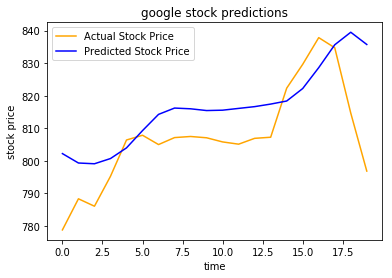

In [54]:
plt.plot(realprice, color ='orange' , label = 'Actual Stock Price' )
plt.plot(predictions, color ='blue' , label = 'Predicted Stock Price' )
plt.title('google stock predictions')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
